In [1]:
import sqlite3
import pandas as pd
# Create your connection.
cnx = sqlite3.connect('../Scraping/Data/ArticleReactions.db')
df = pd.read_sql_query("SELECT * FROM ArticlesWithReactions", cnx)

In [2]:
df

,id,topic,title,commentcount,likecount,collectioncont
0,239718416,mood,放不下確診離世的家人,402,8535,1207
1,239716067,mood,穿這樣被罵很騷,398,2306,296
2,239714602,mood,我家人說我在賣肉,405,1911,706
3,239713212,mood,跟差點被騙去柬埔寨的朋友絕交了,112,678,181
4,239719301,mood,可以不要抹黑Bump了嗎,56,555,60
...,...,...,...,...,...,...
13008,240017885,talk,有人收過這種訊息嗎,2,0,0
13009,240017873,talk,對基督教是因人還是宗教不喜歡？,25,7,5
13010,240017818,talk,請益,0,0,0
13011,240017764,talk,youtube premium家庭版問題,1,0,0


In [22]:
length = df.shape[0]
quaterLength = length//4
print(df['title'][50])

讓人窒息的家庭


In [4]:
sumComment, sumLike, sumCollection = 0, 0, 0
for x in range (length):
    sumComment+=int(df['commentcount'][x])
    sumLike+=int(df['likecount'][x]) 
    sumCollection+=int(df['collectioncont'][x]) 
avgComment, avgLike, avgCollection = sumComment/length, sumLike/length, sumCollection/length
avgComment, avgLike, avgCollection

(14.595481441635288, 44.46906939214632, 16.37923614846692)

In [5]:
topComment = df.sort_values('commentcount',ascending=False)[:quaterLength]
lowComment = df.sort_values('commentcount',ascending=False)[-quaterLength:]

In [6]:
topLike = df.sort_values('likecount',ascending=False)[:quaterLength]
lowLike = df.sort_values('likecount',ascending=False)[-quaterLength:]

In [7]:
topCollect = df.sort_values('collectioncont',ascending=False)[:quaterLength]
lowCollect = df.sort_values('collectioncont',ascending=False)[-quaterLength:]

In [8]:
import jieba.analyse
def jiebaSlice(content):
    stopword_set = []

    with open('./stopword.txt','r', encoding='utf-8') as stopwords:
        for stopword in stopwords:
            stopword_set.append(stopword.strip('\n'))

    content = content.strip('\n')
    
#     words = jieba.posseg.cut(content,HMM=True)
#     words = jieba.analyse.extract_tags(content,topK=3,withWeight=True)
    words = jieba.analyse.textrank(content,topK=3,withWeight=True)

    slicedWords = []
    for word, flag in words:
        if word not in stopword_set and word != ' ' and word != '」' and word != '「':
            slicedWords.append(word)

    return slicedWords

In [9]:
topCommentList = topComment['title'].tolist()
lowCommentList = lowComment['title'].tolist()
topLikeList = topLike['title'].tolist()
lowLikeList = lowLike['title'].tolist()
topCollectTileList = topCollect['title'].tolist()
lowCollectTitleList = lowCollect['title'].tolist()

print(topCommentList[-10:],topLikeList[-10:],topCollectTileList[-10:])

def countSlicedWordTimes(titleList):
    jieba_result_article = []
    for x in range(quaterLength):
        jieba_result_article+=jiebaSlice(titleList[x])
    countWord = []
    for x in set(jieba_result_article):
        countWord.append([jieba_result_article.count(x), x])
    countWord = sorted(countWord)
    countWord = countWord[::-1]
    return countWord

topCommentCountWord = countSlicedWordTimes(topCommentList)
lowCommentCountWord = countSlicedWordTimes(lowCommentList)

topLikeCountWord = countSlicedWordTimes(topLikeList)
lowLikeCountWord = countSlicedWordTimes(lowLikeList)

topCollectCountWord = countSlicedWordTimes(topCollectTileList)
lowCollectCountWord = countSlicedWordTimes(lowCollectTitleList)

Building prefix dict from the default dictionary ...


['在客運上有戀愛的感覺🥰', '每天都好仇富', '覺得很孤單', '現在才發現，原來女孩子這麼抵觸認識陌生男孩，是因為太多低能兒', '父母準備熟齡離婚，求解\U0001f972', '阿嬤', '為什麼胖的男生要穿無袖', '看完這篇文章留言的心得', '問）住家裡帳單誰負責繳？', '近期做餐飲遇到最賭爛的事'] ['因為胸部大被討厭…\U0001f972', '帝國王冠的謝幕：英國女王伊麗莎白二世逝世（1926－2022）', '最倒楣的通緝犯，陳偉捷', '會因為禮貌網聊一個月嗎？', '剛被分手後發現好像懷孕', '另一半約過帶來的不安全感', '中秋禮盒分享', '老公想要我視婆婆為一家人', '你知道嗎？其實沒有人真正在乎你', '李沛旭跟本笑話製造機'] ['拜月老失敗', '男友瘋狂的親你', '還有人想生小孩？（2）', '我媽離開了以後', '英國女王逝世！', '吃了鹽酥雞就不生氣了', '誰來拯救她？！', '孕氣之一個小屁的誕生', '承諾只有在愛時才算數嗎', '快來罵醒還想前任的我']


Dumping model to file cache /var/folders/hk/mq7wdy2953z7gw87361tc3hw0000gn/T/jieba.cache
Loading model cost 1.082 seconds.
Prefix dict has been built successfully.


In [10]:
print(topCommentCountWord)
filterTimes=30

[[165, '男友'], [69, '男生'], [65, '女生'], [64, '女友'], [56, '朋友'], [55, '喜歡'], [42, '分手'], [41, '覺得'], [32, '知道'], [32, '台灣'], [31, '軟體'], [27, '交友'], [25, '確診'], [24, '不想'], [23, '發現'], [23, '交往'], [21, '男朋友'], [20, '感覺'], [20, '家人'], [20, '大學'], [20, '前任'], [19, '包養'], [19, '不到'], [18, '遇到'], [17, '父母'], [17, '好像'], [17, '女朋友'], [16, '接受'], [16, '感情'], [16, '對象'], [16, '前女友'], [15, '情侶'], [15, '小孩'], [15, '媽媽'], [14, '需要'], [14, '生活'], [13, '異性'], [13, '柬埔寨'], [13, '室友'], [12, '自殺'], [12, '看到'], [12, '前男友'], [12, '分享'], [11, '認識'], [11, '網友'], [11, '結婚'], [11, '手機'], [11, '壓力'], [11, '可愛'], [11, '人生'], [10, '警察'], [10, '訊息'], [10, '正妹'], [10, '機會'], [10, '東西'], [10, '應該'], [10, '心情'], [10, '希望'], [10, '奇怪'], [10, '出軌'], [9, '願意'], [9, '適合'], [9, '遊戲'], [9, '討厭'], [9, '英國'], [9, '臉書'], [9, '習慣'], [9, '男人'], [9, '活著'], [9, '條件'], [9, '找到'], [9, '懷孕'], [9, '問題'], [8, '變成'], [8, '請進'], [8, '詐騙'], [8, '要求'], [8, '老婆'], [8, '生小孩'], [8, '烤肉'], [8, '火車'], [8, '文長'], [8, '放棄'], [8, '愛情'], [8, '影片'

/usr/local/anaconda3/envs/Awesome/lib/python3.7/site-packages/matplotlib/__init__.py


<BarContainer object of 4 artists>

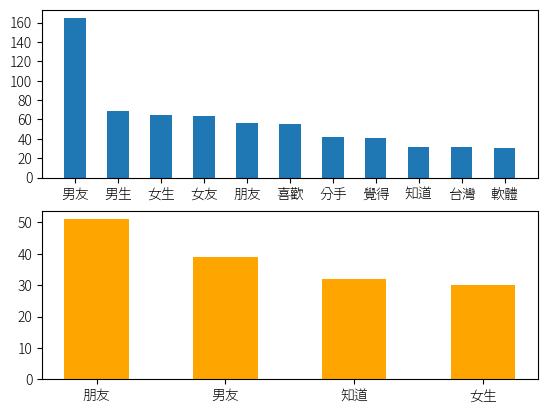

In [11]:
import matplotlib
import matplotlib.pyplot as plt
print(matplotlib.__file__)
filteredTopCommentCountX, filteredTopCommentCountY= [],[]
filteredLowCommentCountX, filteredLowCommentCountY= [],[]

for x in topCommentCountWord:
    if x[0]>=filterTimes:
        filteredTopCommentCountX.append(x[0])
        filteredTopCommentCountY.append(x[1])

for x in lowCommentCountWord:
    if x[0]>=filterTimes:
        filteredLowCommentCountX.append(x[0])
        filteredLowCommentCountY.append(x[1])  
        
fig, ax = plt.subplots(2)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
font = {'size': 6}

matplotlib.rc('font', **font)

ax[0].bar(filteredTopCommentCountY,filteredTopCommentCountX, width=0.5)
ax[1].bar(filteredLowCommentCountY,filteredLowCommentCountX, width=0.5, color = 'orange')

<BarContainer object of 4 artists>

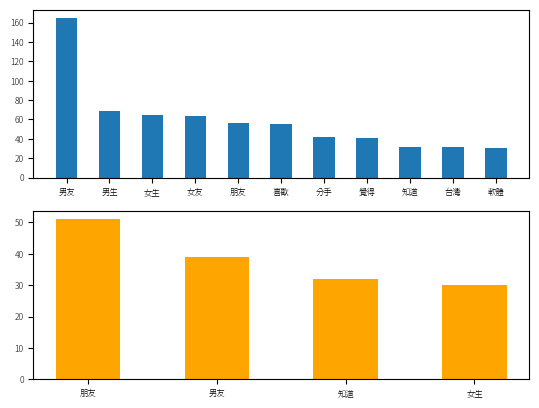

In [12]:
import matplotlib.pyplot as plt
filteredTopLikeCountX, filteredTopLikeCountY= [],[]
filteredLowLikeCountX, filteredLowLikeCountY= [],[]

for x in topCommentCountWord:
    if x[0]>=filterTimes:
        filteredTopLikeCountX.append(x[0])
        filteredTopLikeCountY.append(x[1])

for x in lowCommentCountWord:
    if x[0]>=filterTimes:
        filteredLowLikeCountX.append(x[0])
        filteredLowLikeCountY.append(x[1])  
        
fig, ax = plt.subplots(2)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
font = {'size': 6}

matplotlib.rc('font', **font)

ax[0].bar(filteredTopLikeCountY,filteredTopLikeCountX, width=0.5)
ax[1].bar(filteredLowLikeCountY,filteredLowLikeCountX, width=0.5, color = 'orange')

<BarContainer object of 4 artists>

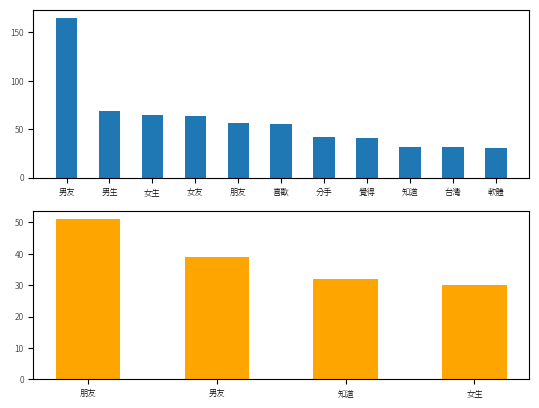

In [13]:
import matplotlib.pyplot as plt
filteredTopCollectCountX, filteredTopCollectCountY= [],[]
filteredLowCollectCountX, filteredLowCollectCountY= [],[]

for x in topCommentCountWord:
    if x[0]>=filterTimes:
        filteredTopCollectCountX.append(x[0])
        filteredTopCollectCountY.append(x[1])

for x in lowCommentCountWord:
    if x[0]>=filterTimes:
        filteredLowCollectCountX.append(x[0])
        filteredLowCollectCountY.append(x[1])  
        
fig, ax = plt.subplots(2)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
font = {'size': 9}

matplotlib.rc('font', **font)

ax[0].bar(filteredTopCollectCountY,filteredTopCollectCountX, width=0.5)
ax[1].bar(filteredLowCollectCountY,filteredLowCollectCountX, width=0.5, color = 'orange')

<BarContainer object of 11 artists>

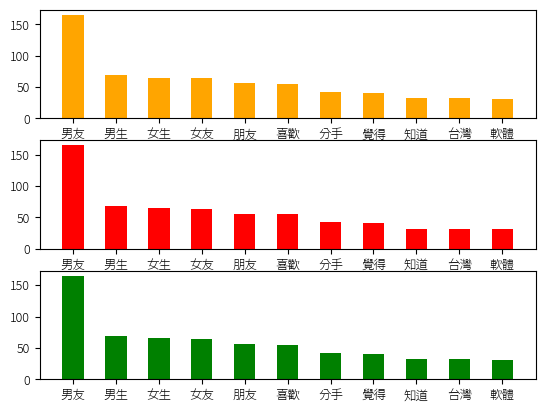

In [14]:
fig, ax = plt.subplots(3)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
font = {'size': 6}
matplotlib.rc('font', **font)
ax[0].bar(filteredTopCommentCountY,filteredTopCommentCountX, width=0.5, color = 'orange')
ax[1].bar(filteredTopLikeCountY,filteredTopLikeCountX, width=0.5, color = 'red')
ax[2].bar(filteredTopCollectCountY,filteredTopCollectCountX, width=0.5, color = 'green')

<BarContainer object of 4 artists>

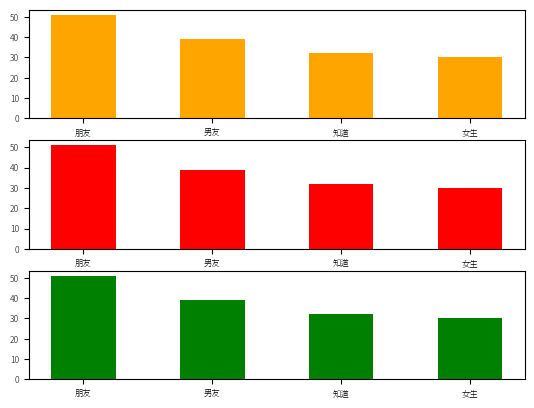

In [15]:
fig, ax = plt.subplots(3)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
font = {'size': 6}
matplotlib.rc('font', **font)
ax[0].bar(filteredLowCommentCountY,filteredLowCommentCountX, width=0.5, color = 'orange')
ax[1].bar(filteredLowLikeCountY,filteredLowLikeCountX, width=0.5, color = 'red')
ax[2].bar(filteredLowCollectCountY,filteredLowCollectCountX, width=0.5, color = 'green')

In [16]:
import matplotlib
print(matplotlib.__file__)

/usr/local/anaconda3/envs/Awesome/lib/python3.7/site-packages/matplotlib/__init__.py


In [17]:
allTopic = df['title']
allTopicList = allTopic.tolist()
allTopicWordCount = countSlicedWordTimes(allTopicList)
print(allTopicWordCount)

[[133, '男友'], [66, '女生'], [64, '朋友'], [51, '女友'], [48, '喜歡'], [44, '台灣'], [43, '男生'], [35, '覺得'], [32, '軟體'], [28, '分手'], [27, '遇到'], [27, '知道'], [26, '柬埔寨'], [24, '詐騙'], [24, '發現'], [24, '家人'], [23, '感情'], [23, '好像'], [23, '交友'], [21, '感覺'], [20, '情侶'], [18, '不想'], [17, '希望'], [17, '小孩'], [16, '警案'], [16, '認識'], [15, '警察'], [15, '愛情'], [15, '媽媽'], [14, '討厭'], [14, '確診'], [14, '男人'], [14, '接受'], [14, '大學'], [14, '包養'], [13, '看到'], [13, '異性'], [13, '正妹'], [13, '文長'], [13, '工作'], [13, '問題'], [12, '廢死'], [12, '對象'], [12, '單身'], [12, '台南'], [12, '交往'], [11, '自殺'], [11, '戀愛'], [11, '想要'], [11, '壓力'], [11, '前任'], [11, '分享'], [11, '不到'], [10, '心得'], [10, '家庭'], [10, '女朋友'], [10, '女孩'], [10, '奇怪'], [10, '事情'], [10, '下船'], [9, '需要'], [9, '訊息'], [9, '臉書'], [9, '相信'], [9, '男朋友'], [9, '影片'], [9, '取名'], [9, '不用'], [8, '選擇'], [8, '請益'], [8, '老婆'], [8, '結婚'], [8, '畢業'], [8, '爸爸'], [8, '爸媽'], [8, '活著'], [8, '檢討'], [8, '條件'], [8, '支持'], [8, '成為'], [8, '應該'], [8, '實錄'], [8, '在意'], [8, '前男友'], [8, '前女友']

In [18]:
print(len(allTopic))

13013
